<a href="https://colab.research.google.com/github/hitesh-c/hh/blob/master/gnss_tracking.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



> GNSS TRACKING PYTHON NOTEBOOK


# **1. MAP MATCHING USING FMM**

### **INSTALLING DEPENDENCIES**

In [ ]:
!pip install pyshp
!pip install geopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.5/46.5 KB 3.0 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 36.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 110.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.1/16.1 MB 99.5 MB/s eta 0:00:00


## **CODE TO CONVERT JSON INTO SHP FILE**

### **CONFIGURATION**

In [ ]:
INPUT_JSON_FILE_NAME_1 = 'JSON_11-10_qnr1.txt'
OUTPUT_SHP_FILE_NAME_1 = 'output.shp'

INPUT_JSON_FILE_NAME_2 = 'json.txt'
OUTPUT_SHP_FILE_NAME_2 = 'output1.shp'



In [ ]:
!import shapefile
!import json

try:
    # Read JSON data from file
    with open(INPUT_JSON_FILE_NAME_2, 'r') as f:
        data = json.load(f)
except FileNotFoundError:
    print("Could not find data.json file.")
    exit(1)
except json.JSONDecodeError:
    print("Invalid JSON data in file.")
    exit(1)

try:
    # Create shapefile writer
    w = shapefile.Writer(OUTPUT_SHP_FILE_NAME_2, shapefile.POINT)
except:
    print("Error creating shapefile writer.")
    exit(1)

# Define shapefile fields
w.field('c_id', 'N')
w.field('d_id', 'N')
w.field('reception_timestamp', 'C', size=30)
w.field('qnr', 'C', size=16)

# Loop through each record and add to shapefile
for record in data:
    try:
        lon, lat = record['tracking']['gps_data']['lon'], record['tracking']['gps_data']['lat']
        w.point(lon, lat)
        w.record(record['c_id'], record['d_id'], record['reception_timestamp'], record['qnr'])
    except KeyError:
        print("Invalid record format:", record)
        continue

try:
    # Save shapefile
    w.close()
except:
    print("Error closing shapefile writer.")
    exit(1)


# **REFERENCE: ADDITIONAL INFORMATION**



```
.shp file contains the actual geometric data of the shapefile, such as points, lines, or polygons.
.shx file is an index file that allows the GIS software to locate specific features within the .shp file more quickly.
.dbf file contains attribute data for each feature in the shapefile, such as names, IDs, and other non-spatial data.
It's important to keep all three files together and in the same directory when working with shapefiles. If any of the three files are missing or moved to a different location, the shapefile may not display correctly or may not work at all.
```





```
FMM (Fast Map Matching) can take GPS trajectory data and network data as input.

For GPS trajectory data, FMM supports three formats:

GDAL trajectory file: an ESRI shapefile where each feature stores a trajectory.
CSV trajectory file: a CSV file with a header row and columns separated by semicolons (;).
CSV point file: a CSV file with a header row and columns separated by semicolons (;).
For network data, FMM supports two formats:

OSM xml or binary format.
ESRI shapefile.
It is important to note that the network data must be routable, which means it should have fields representing id, source, and target fields, and bidirectional roads should be stored as two reverse lines. The network data can be converted from ESRI shapefile to CSV format using the GDAL program, and OSM network data can be downloaded using the OSMNX package.





```



# **Visualizing First Shape file**

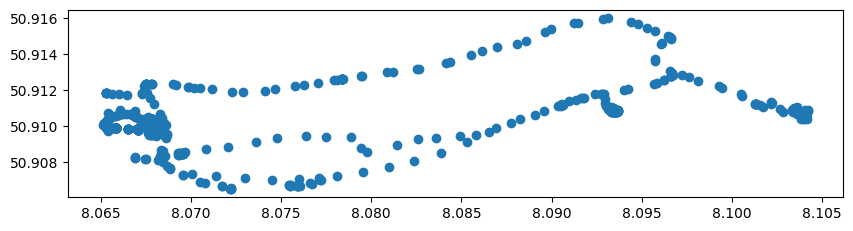

In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Load shapefile
fp = OUTPUT_SHP_FILE_NAME
data = gpd.read_file(fp)

# Plot shapefile
fig, ax = plt.subplots(figsize=(10, 10))
data.plot(ax=ax)
plt.show()


# **Visualizing Second Shape file**

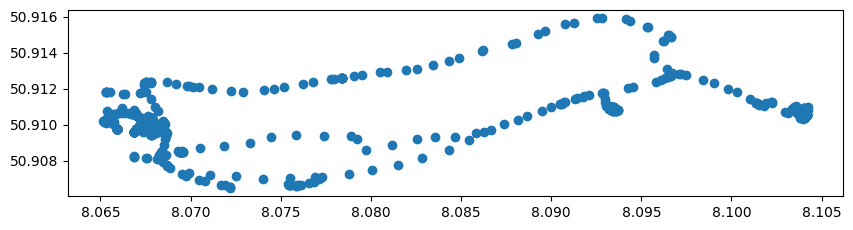

In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Load shapefile
fp = OUTPUT_SHP_FILE_NAME_2
data = gpd.read_file(fp)

# Plot shapefile
fig, ax = plt.subplots(figsize=(10, 10))
data.plot(ax=ax)
plt.show()


# **Installation of FMM**

In [ ]:
!pip uninstall fmm 

Found existing installation: FMM 0.12
Uninstalling FMM-0.12:
  Would remove:
    /usr/local/lib/python3.9/dist-packages/FMM-0.12.dist-info/*
    /usr/local/lib/python3.9/dist-packages/fmm.py
Proceed (Y/n)? y
  Successfully uninstalled FMM-0.12


In [ ]:
!add-apt-repository ppa:ubuntugis/ppa
!apt-get -q update
!apt-get install -y libboost-dev libboost-serialization-dev gdal-bin libgdal-dev make cmake libbz2-dev libexpat1-dev swig python-dev

 Official stable UbuntuGIS packages.


 More info: https://launchpad.net/~ubuntugis/+archive/ubuntu/ppa
Press [ENTER] to continue or Ctrl-c to cancel adding it.

Get:1 http://security.ubuntu.com/ubuntu focal-security InRelease [114 kB]
Get:2 https://cloud.r-project.org/bin/linux/ubuntu focal-cran40/ InRelease [3,622 B]
Hit:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2004/x86_64  InRelease
Hit:4 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu focal InRelease
Hit:5 http://archive.ubuntu.com/ubuntu focal InRelease
Get:6 http://archive.ubuntu.com/ubuntu focal-updates InRelease [114 kB]
Hit:7 http://ppa.launchpad.net/cran/libgit2/ubuntu focal InRelease
Get:8 http://security.ubuntu.com/ubuntu focal-security/main amd64 Packages [2,590 kB]
Get:9 http://security.ubuntu.com/ubuntu focal-security/universe amd64 Packages [1,027 kB]
Hit:10 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu focal InRelease
Get:11 http://archive.ubuntu.com/ubuntu focal-backports InRelease [108 k

In [ ]:
!git clone https://github.com/cyang-kth/fmm.git


Cloning into 'fmm'...
remote: Enumerating objects: 5162, done.
remote: Counting objects: 100% (43/43), done.
remote: Compressing objects: 100% (33/33), done.
remote: Total 5162 (delta 14), reused 35 (delta 10), pack-reused 5119
Receiving objects: 100% (5162/5162), 15.33 MiB | 29.79 MiB/s, done.
Resolving deltas: 100% (3062/3062), done.


In [ ]:
%cd fmm
!mkdir build
%cd build
!cmake ..
!make -j4
!sudo make install


/content/fmm
/content/fmm/build
-- CMAKE version 3.25.2
-- Set CMP0074 state to NEW
-- Set CMP0086 state to NEW
-- Set CMP0078 state to NEW
-- The C compiler identification is GNU 9.4.0
-- The CXX compiler identification is GNU 9.4.0
-- Detecting C compiler ABI info
-- Detecting C compiler ABI info - done
-- Check for working C compiler: /usr/bin/cc - skipped
-- Detecting C compile features
-- Detecting C compile features - done
-- Detecting CXX compiler ABI info
-- Detecting CXX compiler ABI info - done
-- Check for working CXX compiler: /usr/bin/c++ - skipped
-- Detecting CXX compile features
-- Detecting CXX compile features - done
-- 
No conda environment found in PATH!
PATH=/opt/bin:/usr/local/nvidia/bin:/usr/local/cuda/bin:/usr/local/sbin:/usr/local/bin:/usr/sbin:/usr/bin:/sbin:/bin:/tools/node/bin:/tools/google-cloud-sdk/bin

-- Could NOT find Conda (missing: CONDA_PREFIX) 
-- Non conda exist, search library in default path
-- Found GDAL: /usr/lib/libgdal.so (found suitable vers

# **Implementing FMM**

In [ ]:
!fmm


[info][fmm_app_config.cpp:49 ] Start reading FMM configuration from arguments
fmm argument lists:
--ubodt (required) <string>: Ubodt file name
--network (required) <string>: Network file name
--network_id (optional) <string>: Network id name (id)
--source (optional) <string>: Network source name (source)
--target (optional) <string>: Network target name (target)
--gps (required) <string>: GPS file name
--gps_id (optional) <string>: GPS id name (id)
--gps_x (optional) <string>: GPS x name (x)
--gps_y (optional) <string>: GPS y name (y)
--gps_timestamp (optional) <string>: GPS timestamp name (timestamp)
--gps_geom (optional) <string>: GPS geometry name (geom)
--gps_point (optional): if specified read input data as gps point, otherwise (default) read input data as trajectory
--output (required) <string>: Output file name
--output_fields (optional) <string>: Output fields
  opath,cpath,tpath,mgeom,pgeom,
  offset,error,spdist,tp,ep,length,duration,speed,all
-k/--candidates (optional) <int>

In [ ]:
!cd /content/fmm/example/python
!python fmm_test.py

  File "/content/fmm/example/python/fmm_test.py", line 4
    print graph.get_num_vertices()
          ^
SyntaxError: invalid syntax


In [ ]:
!pwd
!ubodt_gen ubodt_config.xml
  # Command line arguments
!ubodt_gen --network ../data/edges.shp --output ubodt.txt --delta 3
# !ubodt_gen --network /content/edges.shp --output /content/ubodt.txt --delta 3

/content/fmm/example/python
[info][ubodt_gen_app_config.cpp:28 ] Read configuration from xml file: ubodt_config.xml
terminate called after throwing an instance of 'boost::wrapexcept<boost::property_tree::xml_parser::xml_parser_error>'
  what():  ubodt_config.xml: cannot open file
[info][ubodt_gen_app_config.cpp:42 ] Start reading ubodt configuration from arguments
[info][ubodt_gen_app_config.cpp:70 ] Finish with reading ubodt arg configuration
[info][ubodt_gen_app_config.cpp:74 ] ----    Print configuration   ----
[info][network_config.cpp:6  ] NetworkConfig
[info][network_config.cpp:7  ] File name: ../data/edges.shp 
[info][network_config.cpp:8  ] ID name: id 
[info][network_config.cpp:9  ] Source name: source 
[info][network_config.cpp:10 ] Target name: target 
[info][ubodt_gen_app_config.cpp:76 ] Delta 3
[info][ubodt_gen_app_config.cpp:77 ] Output file ubodt.txt
[info][ubodt_gen_app_config.cpp:78 ] Log level 2-info
[info][ubodt_gen_app_config.cpp:79 ] Use omp false
[info][ubodt_gen_

### **Code for doing map matching using FMM in Python: LOCAL**

In [ ]:
from fmm import Network, NetworkGraph, FastMapMatch, FastMapMatchConfig, UBODT
import shapefile

# Load network data and graph
network = Network("output1.shp")
print ("Nodes {} edges {}".format(network.get_node_count(), network.get_edge_count())
graf = NetworkGraph(network)

# Precompute an UBODT file
ubodt_gen = UBODTGenAlgorithm(network, graf)
status = ubodt_gen.generate_ubodt("ubodt.txt", 4, binary=False, use_omp=True)
print status

# Load UBODT data
ubodt = UBODT.read_ubodt_csv("ubodt.txt")

# Create FMM model
model = FastMapMatch(network, graf, ubodt)

# Define FMM configuration
k = 4
radius = 0.4
gps_error = 0.5
fmm_config = FastMapMatchConfig(k, radius, gps_error)

# Open the input shapefile and read the line segments
input_shp = shapefile.Reader("input.shp")
line_segments = input_shp.shapes()

# Open output files for accuracy and MRT
accuracy_file = open("accuracy.txt", "w")
mrt_file = open("mrt.txt", "w")

# Iterate over each line segment and perform map matching
for line_segment in line_segments:
    # Convert line segment to WKT format
    wkt = "LINESTRING("
    for point in line_segment.points:
        wkt += str(point[0]) + " " + str(point[1]) + ","
    wkt = wkt[:-1] + ")"
    
    # Perform map matching
    result = model.match_wkt(wkt, fmm_config)
    
    # Write accuracy to file
    accuracy_file.write(str(result.error) + "\n")
    
    # Write matched route to file
    mrt_file.write(result.mgeom.export_wkt() + "\n")

# Close output files
accuracy_file.close()
mrt_file.close()

print "Map matching complete."


**Custom Python script to do map match**

In [ ]:
from fmm import Network

network = Network("edges1.shp")

from fmm import GPSConfig

input_config = GPSConfig()
input_config.file = "output1.shp"
input_config.id = "id"

from fmm import FastMapMatch, NetworkGraph, UBODT

graph = NetworkGraph(network)
ubodt = UBODT.read_ubodt_csv("ubodt.txt")
model = FastMapMatch(network, graph, ubodt)

from fmm import FastMapMatchConfig

k = 4
radius = 0.4
gps_error = 0.5
fmm_config = FastMapMatchConfig(k, radius, gps_error)

from fmm import ResultConfig

result_config = ResultConfig()
result_config.file = "output.txt"
result_config.output_config.write_opath = True

status = model.match_gps_file(input_config, result_config, fmm_config)

print(status)



In [ ]:
!export PYTHONPATH=$PYTHONPATH:/content/fmm/
!echo $PYTHONPATH


/env/python


In [ ]:
!zip -r /content/fmm.zip /content/fmm

  adding: content/fmm/ (stored 0%)
  adding: content/fmm/src/ (stored 0%)
  adding: content/fmm/src/algorithm/ (stored 0%)
  adding: content/fmm/src/algorithm/geom_algorithm.hpp (deflated 77%)
  adding: content/fmm/src/algorithm/geom_algorithm.cpp (deflated 80%)
  adding: content/fmm/src/app/ (stored 0%)
  adding: content/fmm/src/app/stmatch.cpp (deflated 42%)
  adding: content/fmm/src/app/ubodt_gen_app.cpp (deflated 40%)
  adding: content/fmm/src/app/h3mm.cpp (deflated 42%)
  adding: content/fmm/src/app/fmm.cpp (deflated 41%)
  adding: content/fmm/src/fmm-api.hpp (deflated 68%)
  adding: content/fmm/src/io/ (stored 0%)
  adding: content/fmm/src/io/gps_reader.hpp (deflated 74%)
  adding: content/fmm/src/io/mm_writer.cpp (deflated 78%)
  adding: content/fmm/src/io/mm_writer.hpp (deflated 62%)
  adding: content/fmm/src/io/gps_reader.cpp (deflated 78%)
  adding: content/fmm/src/python/ (stored 0%)
  adding: content/fmm/src/python/pyfmm.hpp (deflated 59%)
  adding: content/fmm/src/core/ (s

In [ ]:
!ubodt_gen ubodt_config_omp.xml
!ubodt_gen --network ../data/edges1.shp --output ubodt.txt --delta 3 --use_omp

[info][ubodt_gen_app_config.cpp:28 ] Read configuration from xml file: ubodt_config_omp.xml
terminate called after throwing an instance of 'boost::wrapexcept<boost::property_tree::xml_parser::xml_parser_error>'
  what():  ubodt_config_omp.xml: cannot open file
[info][ubodt_gen_app_config.cpp:42 ] Start reading ubodt configuration from arguments
[info][ubodt_gen_app_config.cpp:70 ] Finish with reading ubodt arg configuration
[info][ubodt_gen_app_config.cpp:74 ] ----    Print configuration   ----
[info][network_config.cpp:6  ] NetworkConfig
[info][network_config.cpp:7  ] File name: ../data/edges1.shp 
[info][network_config.cpp:8  ] ID name: id 
[info][network_config.cpp:9  ] Source name: source 
[info][network_config.cpp:10 ] Target name: target 
[info][ubodt_gen_app_config.cpp:76 ] Delta 3
[info][ubodt_gen_app_config.cpp:77 ] Output file ubodt.txt
[info][ubodt_gen_app_config.cpp:78 ] Log level 2-info
[info][ubodt_gen_app_config.cpp:79 ] Use omp true
[info][ubodt_gen_app_config.cpp:80 ] 

In [ ]:
# XML configuration
!fmm fmm_config.xml
  # Command line arguments
!fmm --ubodt ubodt.txt --network ../data/edges.shp --gps ../data/output.shp -k 4 -r 0.4 -e 0.5 --output mr.txt

[info][fmm_app_config.cpp:32 ] Start with reading FMM configuration fmm_config.xml
terminate called after throwing an instance of 'boost::wrapexcept<boost::property_tree::xml_parser::xml_parser_error>'
  what():  fmm_config.xml: cannot open file
[info][fmm_app_config.cpp:49 ] Start reading FMM configuration from arguments
[info][fmm_app_config.cpp:78 ] Finish with reading FMM arg configuration
[info][fmm_app_config.cpp:98 ] ----   Print configuration    ----
[info][network_config.cpp:6  ] NetworkConfig
[info][network_config.cpp:7  ] File name: ../data/edges.shp 
[info][network_config.cpp:8  ] ID name: id 
[info][network_config.cpp:9  ] Source name: source 
[info][network_config.cpp:10 ] Target name: target 
[info][gps_config.cpp:8  ] GPS format: GDAL trajectory
[info][gps_config.cpp:9  ] File name: ../data/output.shp 
[info][gps_config.cpp:10 ] ID name: id 
[info][gps_config.cpp:11 ] Timestamp name: timestamp 
[info][result_config.cpp:34 ] ResultConfig
[info][result_config.cpp:35 ] Fil

In [ ]:
# XML configuration
  # XML configuration
!stmatch stmatch_config.xml
  # Command line arguments
!stmatch --network ../data/edges.shp --gps ../data/trips.shp -k 4 -r 0.4 -e 0.5 --output mr.txt

[info][stmatch_app_config.cpp:32 ] Start with reading stmatch xml configuration stmatch_config.xml
terminate called after throwing an instance of 'boost::wrapexcept<boost::property_tree::xml_parser::xml_parser_error>'
  what():  stmatch_config.xml: cannot open file
[info][stmatch_app_config.cpp:48 ] Start reading stmatch configuration from arguments
[info][stmatch_app_config.cpp:77 ] Finish with reading stmatch arg configuration
[info][stmatch_app_config.cpp:81 ] ----   Print configuration    ----
[info][network_config.cpp:6  ] NetworkConfig
[info][network_config.cpp:7  ] File name: ../data/edges.shp 
[info][network_config.cpp:8  ] ID name: id 
[info][network_config.cpp:9  ] Source name: source 
[info][network_config.cpp:10 ] Target name: target 
[info][gps_config.cpp:8  ] GPS format: GDAL trajectory
[info][gps_config.cpp:9  ] File name: ../data/trips.shp 
[info][gps_config.cpp:10 ] ID name: id 
[info][gps_config.cpp:11 ] Timestamp name: timestamp 
[info][result_config.cpp:34 ] ResultC

In [ ]:
!pip install osmnx
!pip install geopandas
!pip install pyproj

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.1/93.1 KB 9.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 54.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 37.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.8/62.8 KB 8.4 MB/s eta 0:00:00
  Attempting uninstall: requests
    Found existing installation: requests 2.27.1
    Uninstalling requests-2.27.1:
      Successfully uninstalled requests-2.27.1
  Attempting uninstall: numpy
    Found existing installation: numpy 1.22.4
    Uninstalling numpy-1.22.4:
      Successfully uninstalled numpy-1.22.4
  Attempting uninstall: pandas
    Found existing installation: pandas 1.4.4
    Uninstalling pandas-1.4.4:
      Successfully uninstalled pandas-1.4.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This b

### **CREATING NETWORK FILE**

In [ ]:
import osmnx as ox

# define a place by its address or latitude and longitude
place = "driestiefenbach, Netphen, Germany"
G = ox.graph_from_place(place, network_type="drive")

# save the graph as a shapefile with required fields
ox.save_graph_shapefile(G, filepath="nyc_network", edge_attributes=["id", "source", "target"])


# **2. MAP MAtching Using OSRM**

In [ ]:
!pip install geopandas


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 13.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.1/16.1 MB 42.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 74.4 MB/s eta 0:00:00


### **Sample code to convert .shp into GeoJSON**

In [ ]:
import geopandas as gpd

# Read the shapefile using geopandas
shapefile = gpd.read_file('roads.shp')

# Convert the shapefile to a GeoJSON file
geojson = shapefile.to_crs(epsg='4326').to_json()

# Print the GeoJSON file
print(geojson)

with open('roads.geojson', 'w') as f:
    f.write(geojson)

{"type": "FeatureCollection", "features": [{"id": "0", "type": "Feature", "properties": {"osm_id": 10660100, "name": "Untere Industriestra\u00dfe", "ref": null, "type": "residential", "oneway": 0, "bridge": 0, "maxspeed": null}, "geometry": {"type": "LineString", "coordinates": [[8.0674011, 50.9123178], [8.0674351, 50.9121669], [8.0674732, 50.9120087], [8.0675381, 50.9118509], [8.0685329, 50.9102313], [8.0685704, 50.9101422], [8.0686274, 50.9099801], [8.0686513, 50.9098748], [8.0686712, 50.9097254], [8.0686784, 50.9095637], [8.0686721, 50.9094509], [8.0686582, 50.9093425], [8.068626, 50.9091951], [8.0685796, 50.9090464], [8.0684271, 50.9086364]]}}, {"id": "1", "type": "Feature", "properties": {"osm_id": 10660102, "name": null, "ref": null, "type": "service", "oneway": 0, "bridge": 0, "maxspeed": null}, "geometry": {"type": "LineString", "coordinates": [[8.0683845, 50.9079433], [8.0694685, 50.9077825], [8.0699445, 50.907734], [8.070403, 50.9077232], [8.0709509, 50.9077104]]}}, {"id": "2

In [ ]:
!pip install osrm


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


### **Downloading Germany Map**

In [ ]:
!wget https://download.geofabrik.de/europe/germany-latest.osm.pbf


--2023-04-05 12:14:26--  https://download.geofabrik.de/europe/germany-latest.osm.pbf
Resolving download.geofabrik.de (download.geofabrik.de)... 65.109.50.43, 65.109.48.72
Connecting to download.geofabrik.de (download.geofabrik.de)|65.109.50.43|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://ftp5.gwdg.de/pub/misc/openstreetmap/download.geofabrik.de/germany-latest.osm.pbf [following]
--2023-04-05 12:14:26--  https://ftp5.gwdg.de/pub/misc/openstreetmap/download.geofabrik.de/germany-latest.osm.pbf
Resolving ftp5.gwdg.de (ftp5.gwdg.de)... 134.76.12.6, 2001:638:60f:110::1:2
Connecting to ftp5.gwdg.de (ftp5.gwdg.de)|134.76.12.6|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4094451960 (3.8G) [application/octet-stream]
Saving to: ‘germany-latest.osm.pbf’

germany-latest.osm. 100%[===================>]   3.81G  20.2MB/s    in 3m 26s  

2023-04-05 12:17:53 (19.0 MB/s) - ‘germany-latest.osm.pbf’ saved [4094451960/4094451960]



Installing python API

In [ ]:
!pip install osrm-py


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for osrm-py: filename=osrm_py-0.5-py3-none-any.whl size=5396 sha256=24029b365f63c55abb622f98ad0625f7c1dfcae7b6f011c56059d13d7bd6d6ac
  Stored in directory: /root/.cache/pip/wheels/d5/70/87/dacf7714aff9768a36ea9a25ffc60392e9b72061c1cd45fdc9
Successfully built osrm-py


In [ ]:
!find / -name osrm 2>/dev/null



/usr/local/lib/python3.9/dist-packages/osrm


In [ ]:
!export PATH=$PATH:/usr/local/lib/python3.9/dist-packages/osrm

In [ ]:
!echo $PATH  #ERROR CANT SET PATH IN COLLAB


/opt/bin:/usr/local/nvidia/bin:/usr/local/cuda/bin:/usr/local/sbin:/usr/local/bin:/usr/sbin:/usr/bin:/sbin:/bin:/tools/node/bin:/tools/google-cloud-sdk/bin


### **Extract the car routing graph for Germany by running the following command:**

In [ ]:
!osrm-extract germany-latest.osm.pbf -p profiles/car.lua


/bin/bash: osrm-extract: command not found


### **To start the server for the location you mentioned (Dreispifenbach, netphen, Deutschland, 57250), assuming you have the corresponding map data in a file called netphen.osrm, you can use the following command:**


In [ ]:
!osrm-routed netphen.osrm --max-table-size 1000 --port 5000 --algorithm mld --location "50.90961,8.08089" --location "50.91858,8.09929"


### **Sample code to Convert your GeoJSON data to the OSRM match service format:**

In [ ]:
import json
import requests

with open('your_geojson_file.geojson') as f:
    data = json.load(f)



url = 'http://localhost:5000/match/v1/car'
match_data = {
    "coordinates": [[feature['geometry']['coordinates'][0], feature['geometry']['coordinates'][1]] for feature in data['features']],
    "steps": "false",
    "geometries": "geojson"
}
response = requests.post(url, json=match_data)


### **Visualization**

In [ ]:
import folium

m = folium.Map(location=route_coordinates[0], zoom_start=13)

folium.PolyLine(route_coordinates, color='red').add_to(m)

# **3. Market Solutions for MAP Matching**

### **Alternative ways**


**Consider using a mapping service or library that offers this functionality out-of-the-box, such as:**

``` 

Google Maps API: The Google Maps API offers a "Snap to Roads" feature that can map match GPS data to the nearest road. You can use the API to upload your JSON files and get back the corresponding matched route.

Mapbox: Mapbox offers a similar feature called "Map Matching" that can match GPS traces to road networks. You can use the Mapbox API to upload your JSON files and get back the corresponding matched route.

OpenStreetMap: OpenStreetMap is an open-source mapping platform that offers several tools for map matching, such as the Open Source Routing Machine (OSRM) and the GraphHopper Routing Engine. You can use these tools to map match your JSON files and get back the corresponding matched route.

GPSBabel: GPSBabel is a free and open-source software that can convert GPS data between different formats, including JSON. You can use GPSBabel to convert your JSON files to a format that is compatible with a mapping service or library that offers map matching.
```



### **Code for Mapbox**

In [ ]:
import json
import mapbox
from geojson import Point, Feature, FeatureCollection

# Replace the access token with your own
access_token = 'YOUR_MAPBOX_ACCESS_TOKEN'

# Create a Mapbox client instance
client = mapbox.Mapbox(access_token)

# Load the input GeoJSON files
with open('input.geojson', 'r') as f:
    input_features = json.load(f)['features']
with open('reference.geojson', 'r') as f:
    reference_features = json.load(f)['features']

# Convert the input features to Mapbox Points
input_points = [Point(feature['geometry']['coordinates']) for feature in input_features]

# Create a Mapbox FeatureCollection from the input Points
input_collection = FeatureCollection([Feature(geometry=point) for point in input_points])

# Perform the map matching using the MapMatching API
response = client.MapMatching.match(input_collection, profile='mapbox.driving')

# Get the matched features from the response
matched_features = response.geojson()['features']

# Print the error and accuracy values for each matched feature
for i, feature in enumerate(matched_features):
    distance_error = feature['properties']['distance']
    match_accuracy = feature['properties']['confidence']
    print(f"Match {i+1}: Distance error = {distance_error}, Accuracy = {match_accuracy}")


### **GITHUB REPO : [Vahallas meili](https://towardsdatascience.com/map-matching-done-right-using-valhallas-meili-f635ebd17053)**

# **4. Visualizing GeoJson files and matching points using python**

### **Installing Python Packages**

In [ ]:
!pip install osmnx networkx geopandas matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.1/93.1 KB 4.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 59.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 45.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.8/62.8 KB 8.4 MB/s eta 0:00:00
  Attempting uninstall: requests
    Found existing installation: requests 2.27.1
    Uninstalling requests-2.27.1:
      Successfully uninstalled requests-2.27.1
  Attempting uninstall: numpy
    Found existing installation: numpy 1.22.4
    Uninstalling numpy-1.22.4:
      Successfully uninstalled numpy-1.22.4
  Attempting uninstall: pandas
    Found existing installation: pandas 1.4.4
    Uninstalling pandas-1.4.4:
      Successfully uninstalled pandas-1.4.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This b

### **Manual Visualization of Buildings GeoJSON**

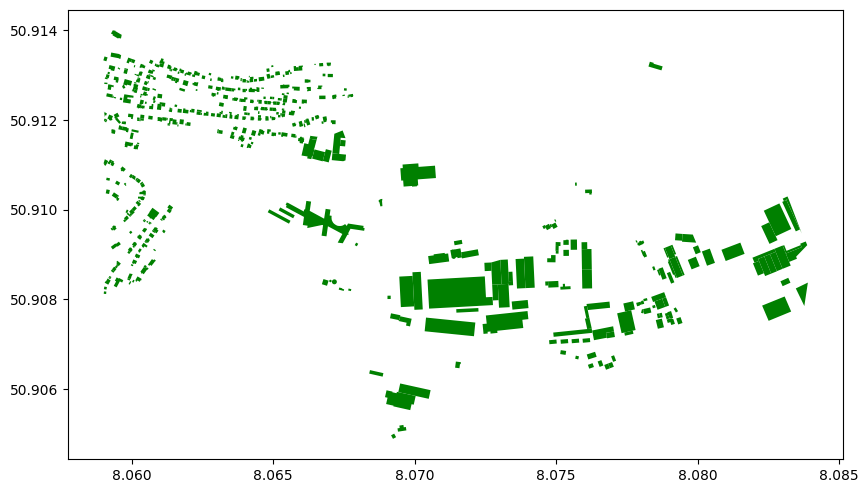

In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt

gdf1 = gpd.read_file('Buildings.geojson')

fig, ax = plt.subplots(figsize=(10,10))
gdf1.plot(ax=ax, color='green')

plt.show()



### **MATCHING POINTS USING OSMX PYTHON LIBRARY**

In [ ]:
!pip install scikit-learn --user


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import osmnx as ox
import networkx as nx
import geopandas as gpd
from shapely.geometry import Point, LineString, Polygon
import matplotlib.pyplot as plt

# Load the GeoJSON file
gdf = gpd.read_file('road.geojson')

# Convert the GeoDataFrame to a list of Shapely Points
points = []
for geometry in gdf.geometry.values:
    if isinstance(geometry, Polygon):
        point = Point(geometry.centroid.x, geometry.centroid.y)
    else:
        point = geometry
    points.append(point)

# Download the road network for the area of interest
G = ox.graph_from_bbox(50.91858, 50.90961, 8.09929, 8.08089, network_type='drive')

# Perform map matching and create a new GeoDataFrame with the matched trajectories
matched_points = []
for i in range(len(points)-1):
    origin_point = points[i]
    destination_point = points[i+1]
    origin_node = ox.distance.nearest_nodes(G, origin_point.x, origin_point.y)
    destination_node = ox.distance.nearest_nodes(G, destination_point.x, destination_point.y)
    route = nx.shortest_path(G, origin_node, destination_node, weight='length')
    line = LineString([(G.nodes[route[i]]['y'], G.nodes[route[i]]['x']) for i in range(len(route))])
    matched_points += list(line.coords)

matched_gdf = gpd.GeoDataFrame(geometry=[Point(p) for p in matched_points], crs=gdf.crs)

# Plot the original and matched trajectories
fig, ax = plt.subplots(figsize=(10,10))
gdf.plot(ax=ax, color='blue')
matched_gdf.plot(ax=ax, color='red')
plt.show()


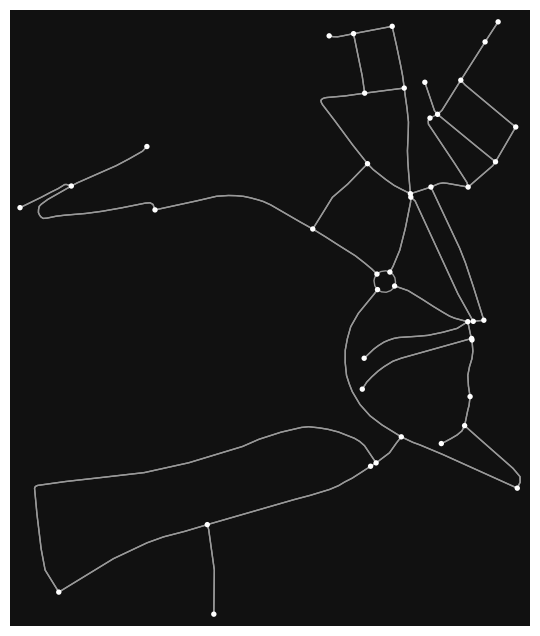

(<Figure size 800x800 with 1 Axes>, <Axes: >)

In [ ]:
import osmnx as ox

# Define the bounding box coordinates
north, south, east, west = 50.91858, 50.90961, 8.09929, 8.08089

# Download the road network for the area of interest
G = ox.graph_from_bbox(north, south, east, west, network_type='drive')

# Plot the road network
ox.plot_graph(G)


In [ ]:
!pip install pandas geopandas shapely matplotlib descartes


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Load the GeoJSON files into GeoDataFrames
gdf1 = gpd.read_file("road.geojson")
gdf2 = gpd.read_file("road.geojson")

# Check that the GeoDataFrames have the same columns
if set(gdf1.columns) != set(gdf2.columns):
    raise ValueError("The two GeoDataFrames have different columns")

# Calculate the symmetric difference between the two GeoDataFrames
diff = gpd.overlay(gdf1, gdf2, how="symmetric_difference")

# Calculate the deviation as the total area of the symmetric difference
deviation = diff.geometry.area.sum()

# Print the deviation
print(f"Deviation between the two GeoJSON files: {deviation} square units")

# Visualize the GeoDataFrames and their symmetric difference
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=(12, 4))
ax1.set_title("File 1")
ax2.set_title("File 2")
ax3.set_title("Symmetric difference")
gdf1.plot(ax=ax1)
gdf2.plot(ax=ax2)
diff.plot(ax=ax3)
plt.show()


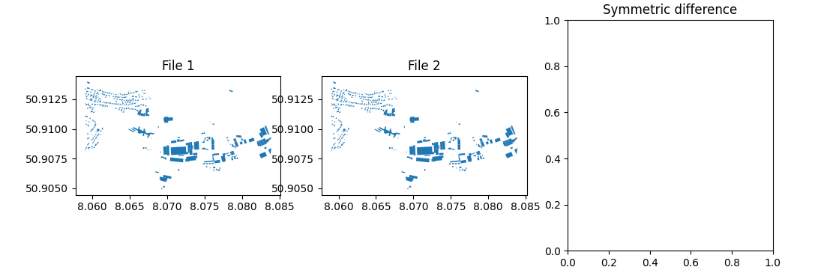

### **PLOTTING BUILDINGS AND CLOUDBOX USING PYTHON**

/usr/local/lib/python3.9/dist-packages/geopandas/base.py:31: UserWarning: The indices of the two GeoSeries are different.
  warn("The indices of the two GeoSeries are different.")
<ipython-input-60-7c722c48a4e9>:14: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: None
Right CRS: EPSG:4326

  deviation = shpfile1.symmetric_difference(shpfile2)


0      GEOMETRYCOLLECTION (POINT (8.06584 50.90986), ...
1      GEOMETRYCOLLECTION (POINT (8.06584 50.90986), ...
2      GEOMETRYCOLLECTION (POINT (8.06584 50.90986), ...
3      GEOMETRYCOLLECTION (POINT (8.06584 50.90986), ...
4      GEOMETRYCOLLECTION (POINT (8.06584 50.90986), ...
                             ...                        
655                                                 None
656                                                 None
657                                                 None
658                                                 None
659                                                 None
Length: 660, dtype: geometry


<Axes: >

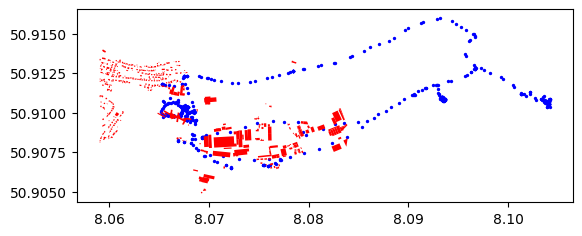

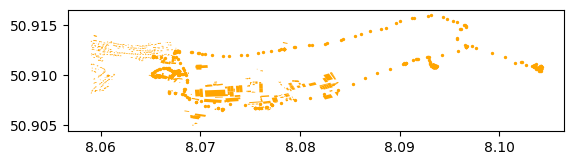

In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Read in the shapefiles
shpfile1 = gpd.read_file('cloudbox.shp')
shpfile2 = gpd.read_file('buildings.shp')

# Plot the GeoDataFrames
fig, ax = plt.subplots()
shpfile1.plot(ax=ax, color='blue', markersize=2)
shpfile2.plot(ax=ax, color='red', markersize=2)

# Calculate the deviation between the two shapefiles
deviation = shpfile1.symmetric_difference(shpfile2)
print(deviation)

# Plot the deviation
fig, ax = plt.subplots()
deviation.plot(ax=ax, color='orange', markersize=2)


### **Installing FOLIUM: PYTHON PAKAGE TO MAP DATA**

In [ ]:
!pip install folium

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


### **MAP MATCHING THE CLOUBOX 2 TRACES**

In [ ]:
import json
import folium
from IPython.display import HTML

# Read GPS traces from JSON file
with open('cloudbox2.json') as f:
    gps_traces = json.load(f)

# Extract GPS coordinates from traces
coords = [[d['tracking']['gps_data']['lat'], d['tracking']['gps_data']['lon']] for d in gps_traces] 
# Create map centered at first GPS coordinate
map_center = coords[0]
m = folium.Map(location=map_center, zoom_start=12)

# Draw line between GPS coordinates
folium.PolyLine(coords, color='blue').add_to(m)

# Save map to HTML file
# m.save('gps_traces_map.html')


# Display the map in the notebook
HTML(m._repr_html_())


### **MAP MATCHING THE both CLOUBOX TRACES**

In [ ]:
import json
import folium

# Read GPS traces from JSON files
with open('cloudbox1.json') as f:
    gps_traces_1 = json.load(f)
    
with open('cloudbox2.json') as f:
    gps_traces_2 = json.load(f)

# Extract GPS coordinates from traces
coords_1 = [[d['tracking']['gps_data']['lat'], d['tracking']['gps_data']['lon']] for d in gps_traces_1]
coords_2 = [[d['tracking']['gps_data']['lat'], d['tracking']['gps_data']['lon']] for d in gps_traces_2]

# Create map centered at first GPS coordinate
map_center = coords_1[0]
m = folium.Map(location=map_center, zoom_start=12)

# Draw line between GPS coordinates with different colors
folium.PolyLine(coords_1, color='blue').add_to(m)
folium.PolyLine(coords_2, color='red').add_to(m)

# Save map to HTML file
# m.save('gps_traces_map.html')

# # Display map in Python using IFrame
# from IPython.display import IFrame
# IFrame(src='gps_traces_map.html', width=700, height=500)


# Display the map in the notebook
HTML(m._repr_html_())


### **MAP MATCHING BUILDINGS GEOJSON USING PYTHON**

In [ ]:
import folium
import json

# Load the geoJSON data
with open('buildings.geojson') as f:
    data = json.load(f)

# Create a folium map object
m = folium.Map(location=[50.913, 8.059], zoom_start=15)

# Add the geoJSON data to the map
folium.GeoJson(data, name='yellow_line', style_function=lambda x: {'color': 'black'}).add_to(m)

# # Save the map as an HTML file
# m.save('map.html')

# Display the map in the notebook
HTML(m._repr_html_())


### **MAP MATCHING ROAD GEOJSON USING PYTHON**

In [ ]:
import folium
import json

# Load the geoJSON data
with open('roads.geojson') as f:
    data = json.load(f)

# Create a folium map object
m = folium.Map(location=[50.913, 8.059], zoom_start=15)

# Add the geoJSON data to the map
folium.GeoJson(data, name='yellow_line', style_function=lambda x: {'color': 'Cyan'}).add_to(m)

# # Save the map as an HTML file
# m.save('map.html')

# Display the map in the notebook
HTML(m._repr_html_())


### **CALCULATING CLOSEST PATH BY CALCULATION POLYGON DISTANCE BETWEEN POLYGON AND PATH POINT(LAT, LONG)**

In [ ]:
import json
from shapely.geometry import Point, Polygon

# Load JSON files
with open('cloudbox1.json', 'r') as f:
    data1 = json.load(f)
with open('cloudbox2.json', 'r') as f:
    data2 = json.load(f)


# Extract coordinates from geoJSON data
# Define polygon vertices
vertices = [(8.068359, 50.909812), (8.068359, 50.908187), (8.070954, 50.908187), (8.070954, 50.909812)]


# Extract coordinates from JSON data
path1 = [(p['tracking']['gps_data']['lat'], p['tracking']['gps_data']['lon']) for p in data1]  
path2 = [(p['tracking']['gps_data']['lat'], p['tracking']['gps_data']['lon']) for p in data2]

# Load geoJSON data
with open('roads.geojson', 'r') as f:
    geojson_data = json.load(f)

# # Extract coordinates from geoJSON data
# coordinates = []
# for feature in geojson_data['features']:
#     if feature['geometry']['type'] == 'Polygon':
#         coordinates.extend(feature['geometry']['coordinates'][0])

# Create polygon from coordinates
polygon = Polygon(vertices)

# Calculate distance between each path and the polygon
path1_distance = sum([polygon.distance(Point(coord)) for coord in path1])
path2_distance = sum([polygon.distance(Point(coord)) for coord in path2]) 

# Determine which path is closest to the polygon
if path1_distance < path2_distance:
    print("Path 1 is closer to the geoJSON path.")
else:
    print("Path 2 is closer to the geoJSON path.")


Path 2 is closer to the geoJSON path.


### **CALCULATING CLOSEST PATH BY CALCULATION POLYGON DISTANCE BETWEEN LINE STRING AND PATH POINT(LAT, LONG)**

In [ ]:
from shapely.geometry import LineString
from folium.plugins import MarkerCluster

# Load geoJSON data
with open('roads.geojson', 'r') as f:
    geojson_data = json.load(f)

# Extract LineString objects from geoJSON data
line_strings = []
for feature in geojson_data['features']:
    if feature['geometry']['type'] == 'LineString':
        coordinates = feature['geometry']['coordinates']
        line_string = LineString(coordinates)
        line_strings.append(line_string)

# Create a map
m = folium.Map(location=path1[0], zoom_start=14)

# Add path1 to map
folium.PolyLine(locations=path1, color='red').add_to(m)

# Add path2 to map
folium.PolyLine(locations=path2, color='blue').add_to(m)

# Add line strings to map
for line_string in line_strings:
    folium.PolyLine(locations=list(line_string.coords), color='cyan').add_to(m)

# Calculate distance between each path and the line strings
path1_distances = [line_string.distance(Point(coord)) for coord in path1 for line_string in line_strings]
path2_distances = [line_string.distance(Point(coord)) for coord in path2 for line_string in line_strings]

path1_mean_distance = np.mean(path1_distances)
path2_mean_distance = np.mean(path2_distances)

path1_min_distance = np.min(path1_distances)
path2_min_distance = np.min(path2_distances)

# Create a MarkerCluster for the min and mean distances
mc = MarkerCluster()
mc.add_child(folium.Marker(location=path1[0], popup=f"Path 1\nMin Distance: {path1_min_distance:.2f} m\nMean Distance: {path1_mean_distance:.2f} m", icon=folium.Icon(color='red')))
mc.add_child(folium.Marker(location=path2[0], popup=f"Path 2\nMin Distance: {path2_min_distance:.2f} m\nMean Distance: {path2_mean_distance:.2f} m", icon=folium.Icon(color='blue')))
m.add_child(mc)


##ERROR
print(path1_distances,"\n",path2_distances)

# Determine which path is closest to the line strings
if path1_mean_distances < path2_mean_distances:
    print("Path 1 RED is closer to the geoJSON path...")
else:
    print("Path 2 BLUE is closer to the geoJSON path...")





[60.58616364073092, 60.583724254703554, 60.58211733653813, 60.57544671236072, 60.58787769492416, 60.59493644720922, 60.59080989144009, 60.59063481487703, 60.59174867580708, 60.59054459033063, 60.5928589170323, 60.5791991737556, 60.58583923050954, 60.58332250692919, 60.586060619285306, 60.585957879802564, 60.592843795992415, 60.59309201881578, 60.59221114408937, 60.592675384447794, 60.591723063076216, 60.585200567703744, 60.57444404253115, 60.58563093059013, 60.58576975205525, 60.58232980163787, 60.57873949342226, 60.57881261524253, 60.59182698805367, 60.59224099843028, 60.59149964740691, 60.59310791746121, 60.584062155856856, 60.592555048790054, 60.57869129048786, 60.58295423677223, 60.57737459328675, 60.58583923050954, 60.58700738425781, 60.58424758557216, 60.58424690596351, 60.59127902155088, 60.58174704694503, 60.59160036486116, 60.58920142548014, 60.58934453412275, 60.585453187757814, 60.585445430506, 60.58208915483412, 60.59200760459082, 60.592070554160145, 60.59188293578127, 60.5

# **5. USING lgorithm 1: MapMatchOHMM http://www.mit.edu/~jaillet/general/map_matching_itsc2012-final.pdf**

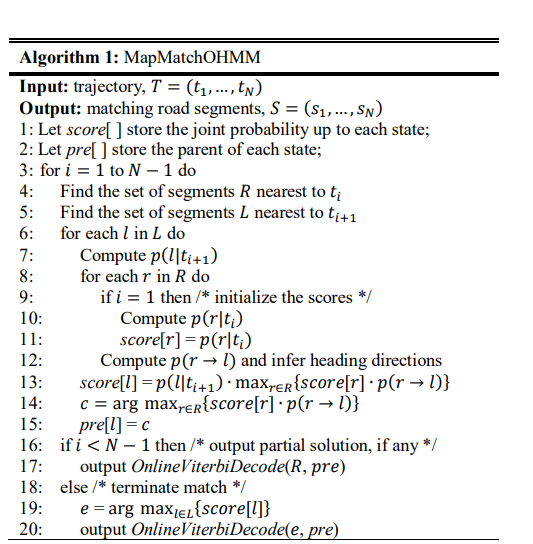

In [ ]:
!pip install networkx

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


### **Pyhton Implmentation of finding matching segments of combined observation state PATH 1 and PATH 2 i.e. trips of both CLOUDBOXES**

In [ ]:
from shapely.geometry import Point, LineString
import networkx as nx

# Define the state space
state_space = nx.Graph()
for feature in geojson_data['features']:
    if feature['geometry']['type'] == 'LineString':
        coordinates = feature['geometry']['coordinates']
        line_string = LineString(coordinates)
        for i in range(len(coordinates) - 1):
            start = Point(coordinates[i])
            end = Point(coordinates[i + 1])
            distance = start.distance(end)
            state_space.add_edge(start, end, weight=distance)

# Define the observation space
observations = []
for coord in path1 + path2:
    observation = Point(coord)
    observations.append(observation)

# Define the transition probabilities
transition_probabilities = {}
for u, v, d in state_space.edges(data=True):
   transition_probabilities[(u, v)] = 1 / len(list(state_space.neighbors(u)))

# Define the emission probabilities
emission_probabilities = {}
for observation in observations:
    for node in state_space.nodes():
        distance = observation.distance(node)
        emission_probabilities[(observation, node)] = distance

def get_closest_node(state_space, point):
    """Find the closest node in the state space to a given point"""
    min_distance = float('inf')
    closest_node = None
    for node in state_space.nodes():
        distance = LineString([node, point]).length
        if distance < min_distance:
            min_distance = distance
            closest_node = node
    return closest_node


# Implement the Viterbi algorithm
score = {}
pre = {}
for node in state_space.nodes():
    score[node] = 0
    pre[node] = None

for observation in observations:
    new_score = {}
    new_pre = {}
    for node in state_space.nodes():
        if pre[node] is not None:
            transition_probability = transition_probabilities[(pre[node], node)]
            emission_probability = emission_probabilities[(observation, node)]
            new_score[node] = score[pre[node]] * transition_probability * emission_probability
            new_pre[node] = max(score, key=score.get)
        else:
            new_score[node] = 1
            new_pre[node] = None
    score = new_score
    pre = new_pre

# Use the sequence of states to determine the matching road segments
matching_segments = []
for i in range(len(observations)):
    observation = observations[i]
    state = max(score, key=score.get)
    matching_segments.append(state)
    if i < len(observations) - 1:
        next_observation = observations[i + 1]
        closest_state_node = get_closest_node(state_space, state)
        closest_next_node = get_closest_node(state_space, get_closest_node(state_space, next_observation))
        transition_probability = transition_probabilities.get((closest_state_node, closest_next_node), 0)
        emission_probability = emission_probabilities[(next_observation, closest_next_node)]
        score[state] = score[state] * transition_probability * emission_probability

# Output the matching road segments
matching_segments.append(max(score, key=score.get))

print(matching_segments)




[<POINT (8.067 50.912)>, <POINT (8.067 50.912)>, <POINT (8.067 50.912)>, <POINT (8.068 50.912)>, <POINT (8.069 50.91)>, <POINT (8.069 50.91)>, <POINT (8.069 50.91)>, <POINT (8.069 50.91)>, <POINT (8.069 50.91)>, <POINT (8.069 50.91)>, <POINT (8.069 50.909)>, <POINT (8.069 50.909)>, <POINT (8.069 50.909)>, <POINT (8.069 50.909)>, <POINT (8.068 50.909)>, <POINT (8.068 50.908)>, <POINT (8.069 50.908)>, <POINT (8.07 50.908)>, <POINT (8.07 50.908)>, <POINT (8.071 50.908)>, <POINT (8.077 50.912)>, <POINT (8.077 50.913)>, <POINT (8.077 50.913)>, <POINT (8.077 50.913)>, <POINT (8.078 50.913)>, <POINT (8.078 50.913)>, <POINT (8.078 50.913)>, <POINT (8.078 50.913)>, <POINT (8.078 50.913)>, <POINT (8.078 50.913)>, <POINT (8.078 50.913)>, <POINT (8.078 50.913)>, <POINT (8.079 50.913)>, <POINT (8.079 50.913)>, <POINT (8.083 50.908)>, <POINT (8.083 50.908)>, <POINT (8.06 50.912)>, <POINT (8.061 50.913)>, <POINT (8.061 50.913)>, <POINT (8.062 50.913)>, <POINT (8.063 50.913)>, <POINT (8.063 50.913)>, 

### **Pyhton Implmentation of finding matching segments of combined observation state PATH 2 i.e. trip of CLOUDBOX1**

In [ ]:
from shapely.geometry import Point, LineString
import networkx as nx

# Define the state space
state_space = nx.Graph()
for feature in geojson_data['features']:
    if feature['geometry']['type'] == 'LineString':
        coordinates = feature['geometry']['coordinates']
        line_string = LineString(coordinates)
        for i in range(len(coordinates) - 1):
            start = Point(coordinates[i])
            end = Point(coordinates[i + 1])
            distance = start.distance(end)
            state_space.add_edge(start, end, weight=distance)

# Define the observation space
observations = []
for coord in path2:
    observation = Point(coord)
    observations.append(observation)

# Define the transition probabilities
transition_probabilities = {}
for u, v, d in state_space.edges(data=True):
   transition_probabilities[(u, v)] = 1 / len(list(state_space.neighbors(u)))

# Define the emission probabilities
emission_probabilities = {}
for observation in observations:
    for node in state_space.nodes():
        distance = observation.distance(node)
        emission_probabilities[(observation, node)] = distance

def get_closest_node(state_space, point):
    """Find the closest node in the state space to a given point"""
    min_distance = float('inf')
    closest_node = None
    for node in state_space.nodes():
        distance = LineString([node, point]).length
        if distance < min_distance:
            min_distance = distance
            closest_node = node
    return closest_node


# Implement the Viterbi algorithm
score = {}
pre = {}
for node in state_space.nodes():
    score[node] = 0
    pre[node] = None

for observation in observations:
    new_score = {}
    new_pre = {}
    for node in state_space.nodes():
        if pre[node] is not None:
            transition_probability = transition_probabilities[(pre[node], node)]
            emission_probability = emission_probabilities[(observation, node)]
            new_score[node] = score[pre[node]] * transition_probability * emission_probability
            new_pre[node] = max(score, key=score.get)
        else:
            new_score[node] = 1
            new_pre[node] = None
    score = new_score
    pre = new_pre

# Use the sequence of states to determine the matching road segments
matching_segments = []
for i in range(len(observations)):
    observation = observations[i]
    state = max(score, key=score.get)
    matching_segments.append(state)
    if i < len(observations) - 1:
        next_observation = observations[i + 1]
        closest_state_node = get_closest_node(state_space, state)
        closest_next_node = get_closest_node(state_space, get_closest_node(state_space, next_observation))
        transition_probability = transition_probabilities.get((closest_state_node, closest_next_node), 0)
        emission_probability = emission_probabilities[(next_observation, closest_next_node)]
        score[state] = score[state] * transition_probability * emission_probability

# Output the matching road segments
matching_segments.append(max(score, key=score.get))

print(matching_segments)




[<POINT (8.067 50.912)>, <POINT (8.067 50.912)>, <POINT (8.067 50.912)>, <POINT (8.068 50.912)>, <POINT (8.069 50.91)>, <POINT (8.069 50.91)>, <POINT (8.069 50.91)>, <POINT (8.069 50.91)>, <POINT (8.069 50.91)>, <POINT (8.069 50.91)>, <POINT (8.069 50.909)>, <POINT (8.069 50.909)>, <POINT (8.069 50.909)>, <POINT (8.069 50.909)>, <POINT (8.068 50.909)>, <POINT (8.068 50.908)>, <POINT (8.069 50.908)>, <POINT (8.07 50.908)>, <POINT (8.07 50.908)>, <POINT (8.071 50.908)>, <POINT (8.077 50.912)>, <POINT (8.077 50.913)>, <POINT (8.077 50.913)>, <POINT (8.077 50.913)>, <POINT (8.078 50.913)>, <POINT (8.078 50.913)>, <POINT (8.078 50.913)>, <POINT (8.078 50.913)>, <POINT (8.078 50.913)>, <POINT (8.078 50.913)>, <POINT (8.078 50.913)>, <POINT (8.078 50.913)>, <POINT (8.079 50.913)>, <POINT (8.079 50.913)>, <POINT (8.083 50.908)>, <POINT (8.083 50.908)>, <POINT (8.06 50.912)>, <POINT (8.061 50.913)>, <POINT (8.061 50.913)>, <POINT (8.062 50.913)>, <POINT (8.063 50.913)>, <POINT (8.063 50.913)>, 

In [ ]:
print(len(matching_segments))

116


### **Pyhton Implmentation of finding matching segments of combined observation state PATH 1 i.e. trips of  CLOUDBOX 1**

In [ ]:
from shapely.geometry import Point, LineString
import networkx as nx

# Define the state space
state_space = nx.Graph()
for feature in geojson_data['features']:
    if feature['geometry']['type'] == 'LineString':
        coordinates = feature['geometry']['coordinates']
        line_string = LineString(coordinates)
        for i in range(len(coordinates) - 1):
            start = Point(coordinates[i])
            end = Point(coordinates[i + 1])
            distance = start.distance(end)
            state_space.add_edge(start, end, weight=distance)

# Define the observation space
observations = []
for coord in path1:
    observation = Point(coord)
    observations.append(observation)

# Define the transition probabilities
transition_probabilities = {}
for u, v, d in state_space.edges(data=True):
   transition_probabilities[(u, v)] = 1 / len(list(state_space.neighbors(u)))

# Define the emission probabilities
emission_probabilities = {}
for observation in observations:
    for node in state_space.nodes():
        distance = observation.distance(node)
        emission_probabilities[(observation, node)] = distance

def get_closest_node(state_space, point):
    """Find the closest node in the state space to a given point"""
    min_distance = float('inf')
    closest_node = None
    for node in state_space.nodes():
        distance = LineString([node, point]).length
        if distance < min_distance:
            min_distance = distance
            closest_node = node
    return closest_node


# Implement the Viterbi algorithm
score = {}
pre = {}
for node in state_space.nodes():
    score[node] = 0
    pre[node] = None

for observation in observations:
    new_score = {}
    new_pre = {}
    for node in state_space.nodes():
        if pre[node] is not None:
            transition_probability = transition_probabilities[(pre[node], node)]
            emission_probability = emission_probabilities[(observation, node)]
            new_score[node] = score[pre[node]] * transition_probability * emission_probability
            new_pre[node] = max(score, key=score.get)
        else:
            new_score[node] = 1
            new_pre[node] = None
    score = new_score
    pre = new_pre

# Use the sequence of states to determine the matching road segments
matching_segments = []
for i in range(len(observations)):
    observation = observations[i]
    state = max(score, key=score.get)
    matching_segments.append(state)
    if i < len(observations) - 1:
        next_observation = observations[i + 1]
        closest_state_node = get_closest_node(state_space, state)
        closest_next_node = get_closest_node(state_space, get_closest_node(state_space, next_observation))
        transition_probability = transition_probabilities.get((closest_state_node, closest_next_node), 0)
        emission_probability = emission_probabilities[(next_observation, closest_next_node)]
        score[state] = score[state] * transition_probability * emission_probability

# Output the matching road segments
matching_segments.append(max(score, key=score.get))

print(len(matching_segments))




[<POINT (8.067 50.912)>, <POINT (8.067 50.912)>, <POINT (8.067 50.912)>, <POINT (8.068 50.912)>, <POINT (8.069 50.91)>, <POINT (8.069 50.91)>, <POINT (8.069 50.91)>, <POINT (8.069 50.91)>, <POINT (8.069 50.91)>, <POINT (8.069 50.91)>, <POINT (8.069 50.909)>, <POINT (8.069 50.909)>, <POINT (8.069 50.909)>, <POINT (8.069 50.909)>, <POINT (8.068 50.909)>, <POINT (8.068 50.908)>, <POINT (8.069 50.908)>, <POINT (8.07 50.908)>, <POINT (8.07 50.908)>, <POINT (8.071 50.908)>, <POINT (8.077 50.912)>, <POINT (8.077 50.913)>, <POINT (8.077 50.913)>, <POINT (8.077 50.913)>, <POINT (8.078 50.913)>, <POINT (8.078 50.913)>, <POINT (8.078 50.913)>, <POINT (8.078 50.913)>, <POINT (8.078 50.913)>, <POINT (8.078 50.913)>, <POINT (8.078 50.913)>, <POINT (8.078 50.913)>, <POINT (8.079 50.913)>, <POINT (8.079 50.913)>, <POINT (8.083 50.908)>, <POINT (8.083 50.908)>, <POINT (8.06 50.912)>, <POINT (8.061 50.913)>, <POINT (8.061 50.913)>, <POINT (8.062 50.913)>, <POINT (8.063 50.913)>, <POINT (8.063 50.913)>, 

In [ ]:
print(len(matching_segments))

118


### **CODE to visualize matching segments**

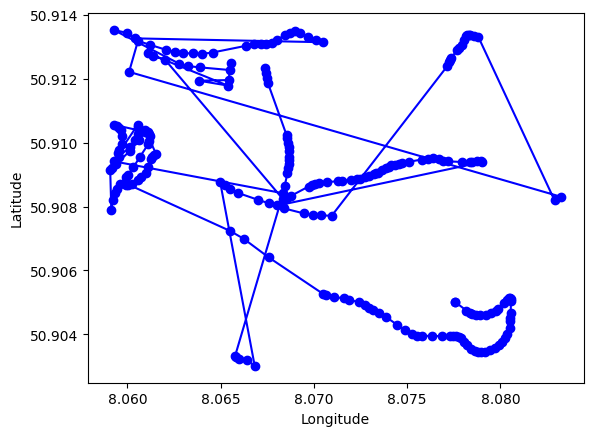

In [ ]:
x = [point.x for point in matching_segments]
y = [point.y for point in matching_segments]

plt.plot(x, y, 'bo-')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()


In [ ]:
import folium
from shapely.geometry import Point, LineString

# Create a Folium map centered at the first point in the matching segments
m = folium.Map(location=[matching_segments[0].y, matching_segments[0].x], zoom_start=15)

# Convert the matching segments into a list of points
points = [(point.y, point.x) for point in matching_segments]

# Convert the list of points into a LineString
line = LineString(points)

# Create a Folium PolyLine object using the LineString
folium.PolyLine(locations=line.coords).add_to(m)

# Display the map
m


In [ ]:
path1_distance = LineString(path1).distance(LineString(matching_segments))
path2_distance = LineString(path2).distance(LineString(matching_segments))

print(path1_distance)

if path1_distance < path2_distance:
    print("Path 1 is closer to the matching road segments")
else:
    print("Path 2 is closer to the matching road segments")


60.55656093142678
Path 1 is closer to the matching road segments


# **REFERENCES**

1. https://fmm-wiki.github.io/
2. https://docs.mapbox.com/api/navigation/directions/#route-leg-object
3. http://www.mit.edu/~jaillet/general/map_matching_itsc2012-final.pdf
4. https://github.com/ustroetz/python-osrm
5. chat gpt